# YOLO
my first time  
lets get init  

In [14]:
import os


relative_train_path = "train"
current_dir = os.getcwd()  #Here
train_path = os.path.join(current_dir, relative_train_path)

train_files = os.listdir(train_path)

train_files[:10]

['apple_49.xml',
 'apple_75.xml',
 'apple_61.xml',
 'apple_75.jpg',
 'apple_61.jpg',
 'apple_49.jpg',
 'orange_3.jpg',
 'orange_3.xml',
 'orange_28.jpg',
 'banana_50.jpg']

In [15]:
import os


relative_test_path = "test"
current_dir = os.getcwd()  #Here
test_path = os.path.join(current_dir, relative_test_path)

test_files = os.listdir(test_path)

test_files[:10]

['banana_93.xml',
 'banana_78.jpg',
 'banana_87.xml',
 'banana_93.jpg',
 'banana_87.jpg',
 'banana_78.xml',
 'banana_86.jpg',
 'banana_79.xml',
 'banana_92.jpg',
 'banana_79.jpg']

In [16]:
# XML 파일을 파싱하기 위한 라이브러리를 임포트합니다.
from xml.etree import ElementTree as ET

# 첫 번째 XML 파일의 경로를 설정합니다.
xml_file_path = os.path.join(train_path, 'apple_28.xml')

# XML 파일을 읽고 내용을 파싱합니다.
tree = ET.parse(xml_file_path)
root = tree.getroot()

# XML 내용을 살펴보기 위해 태그와 텍스트를 출력합니다.
for element in root.iter():
    print(element.tag, element.text)

annotation 
	
folder train
filename apple_28.jpg
path C:\tensorflow1\models\research\object_detection\images\train\apple_28.jpg
source 
		
database Unknown
size 
		
width 0
height 0
depth 3
segmented 0
object 
		
name apple
pose Unspecified
truncated 0
difficult 0
bndbox 
			
xmin 25
ymin 42
xmax 275
ymax 297


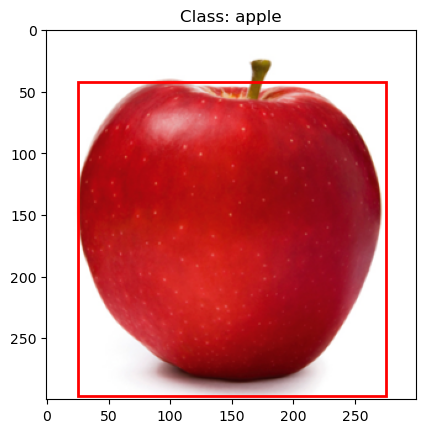

(300, 300, 'apple', (25, 42, 275, 297))

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 파일 경로
image_file_path = os.path.join(train_path, 'apple_28.jpg')

# 이미지를 열고 크기를 얻습니다.
image = Image.open(image_file_path)
image_width, image_height = image.size

# XML 파일에서 경계 상자 정보를 추출합니다.
for obj in root.findall('object'):
    name = obj.find('name').text
    bndbox = obj.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)

# 이미지 위에 경계 상자를 그립니다.
plt.imshow(image)
plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none'))
plt.title(f"Class: {name}")
plt.show()

# 이미지와 경계 상자 정보를 반환합니다.
image_width, image_height, name, (xmin, ymin, xmax, ymax)
